In [1]:
!pip install -q transformers langchain langchain-core langchain-openai openai langchain-anthropic langchain-google-genai google-generativeai langchain-huggingface transformers huggingface-hub python-dotenv numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/70.1 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/42.0 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/289.3 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.3/289.3 kB 17.9 MB/s eta 0:00:00


# What are Models  

The **Model Component** in **LangChain** is a crucial part of the framework, designed to facilitate interactions with various language models and embedding models.

It abstracts the complexity of working directly with different **LLMs**, chat models, and embedding models, providing a **uniform interface** to communicate with them. This makes it easier to build applications that rely on:

- AI-generated text  
- Text embeddings for similarity search  
- Retrieval-augmented generation (**RAG**)


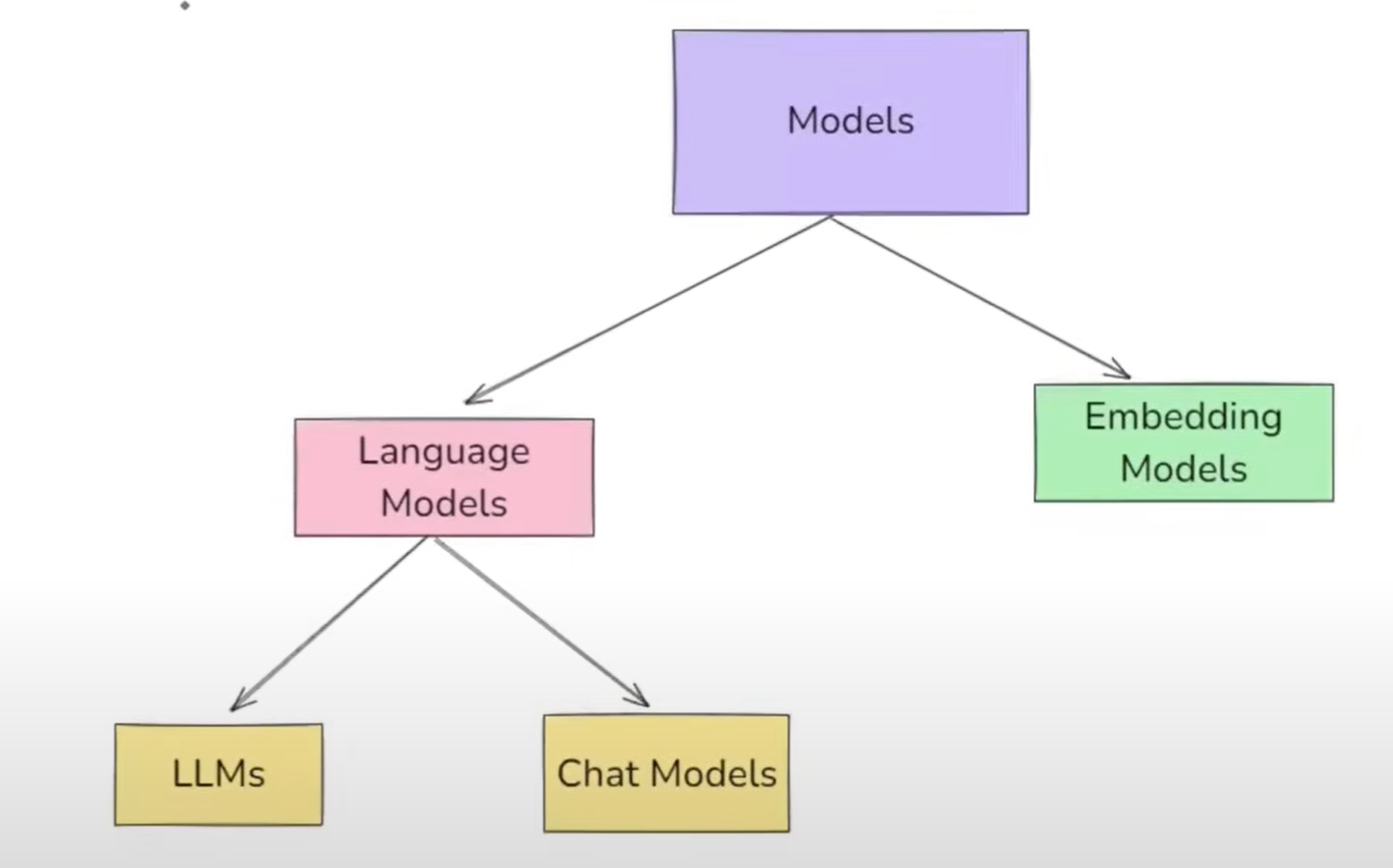

In [8]:
import langchain
print(langchain.__version__)

0.3.26


# **Language Models**

Language Models are AI systems designed to process, generate, and understand natural language text.

**Types of Language Models**

**1. LLMs (Large Language Models)**
- General-purpose models used for raw text generation.
- **Input:** A string (plain text)  
- **Output:** A string (plain text)
- These are traditionally **older models** and are **not used much now**.

**2. Chat Models**
- Language models specialized for **conversational tasks**.
- **Input/Output:** Structured chat messages (not just plain text)
- These are traditionally **newer models** and are **more commonly used** today compared to LLMs.


**Feature Comparison:** LLMs (Base Models) vs Chat Models (Instruction-Tuned)

| **Feature**        | **LLMs (Base Models)**                                           | **Chat Models (Instruction-Tuned)**                                      |
|--------------------|------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Purpose**        | Free-form text generation                                        | Optimized for multi-turn conversations                                    |
| **Training Data**  | General text corpora (books, articles)                           | Fine-tuned on chat datasets (dialogues, user-assistant conversations)     |
| **Memory & Context** | No built-in memory                                               | Supports structured conversation history                                  |
| **Role Awareness** | No understanding of "user" and "assistant" roles                 | Understands "system", "user", and "assistant" roles                       |
| **Example Models** | GPT-3, Llama-2-7B, Mistral-7B, OPT-1.3B                          | GPT-4, GPT-3.5-turbo, Llama-2-Chat, Mistral-Instruct, Claude              |
| **Use Cases**      | Text generation, summarization, translation, creative writing, code generation | Conversational AI, chatbots, virtual assistants, customer support, AI tutors |


# **1. Large Language Models (LLMs)**

In [18]:
!echo "OPENAI_API_KEY = '<your API key here>'" > .env

In [ ]:
from langchain_openai import OpenAI
from dotenv import load_dotenv

load_dotenv()

llm = OpenAI(model="gpt-3.5-turbo-instruct")  # temperature (Randomness Level) and max_completion_tokens (no of output words/tokens) are some Important parameters

result = llm.invoke("What is capital of India?")

result

The capital of India is New Delhi


**Temperature** is a parameter that controls the **randomness** of a language model's output. It affects how **creative** or **deterministic** the responses are.

- **Lower values (0.0–0.3)** → More **deterministic** and **predictable**
- **Higher values (0.7–1.5+)** → More **random**, **creative**, and **diverse**


**Use Cases by Temperature Range**

| **Temperature Range** | **Use Case**                                      | **Recommended For**                                 |
|------------------------|---------------------------------------------------|------------------------------------------------------|
| `0.0 – 0.3`            | Factual answers (math, code, facts)               | Precise, accurate responses                          |
| `0.5 – 0.7`            | Balanced response (general QA, explanations)      | General-purpose interactions                         |
| `0.9 – 1.2`            | Creative writing, storytelling, jokes             | Medium creativity with some control                  |
| `1.5+`                 | Maximum randomness (wild ideas, brainstorming)    | Ideation, unconventional and highly diverse outputs  |

# **2. Chat Models**

In [21]:
# OpenAI - ChatGPT
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()

model = ChatOpenAI(model="gpt-3.5-turbo")

result = model.invoke("What is capital of India?")

result

The capital of India is New Delhi


In [ ]:
# Anthropic - Claude
from langchain_anthropic import ChatAnthropic
from dotenv import load_dotenv

load_dotenv()

model = ChatAnthropic(model='claude-3-5-sonnet-20241022')

result = model.invoke('What is the capital of India')

print(result.content)

In [ ]:
# Google - Gemini
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv

load_dotenv()

model = ChatGoogleGenerativeAI(model='gemini-1.5-pro')

result = model.invoke('What is the capital of India')

print(result.content)

### Open Source Models

Open-source language models are freely available AI models that can be downloaded, modified, fine-tuned, and deployed without restrictions from a central provider.  

Unlike closed-source models such as **OpenAI's GPT-4**, **Anthropic's Claude**, or **Google's Gemini**, open-source models allow **full control and customization**.


#### Feature Comparison: Open-Source vs Closed-Source Models

| **Feature**     | **Open-Source Models**                               | **Closed-Source Models**                                     |
|-----------------|------------------------------------------------------|---------------------------------------------------------------|
| **Cost**        | Free to use (no API costs)                           | Paid API usage (e.g., OpenAI charges per token)               |
| **Control**     | Can modify, fine-tune, and deploy anywhere           | Locked to provider's infrastructure                           |
| **Data Privacy**| Runs locally (no data sent to external servers)      | Sends queries to provider's servers                           |
| **Customization**| Can fine-tune on specific datasets                   | No access to fine-tuning in most cases                        |
| **Deployment**  | Can be deployed on on-premise servers or cloud       | Must use vendor's API                                         |


*Some Famous Open Source Models*

| **Model**            | **Developer**    | **Parameters** | **Best Use Case**                             |
|----------------------|------------------|----------------|------------------------------------------------|
| **LLAMA-2-7B/13B/70B** | Meta AI           | 7B–70B         | General-purpose text generation                |
| **Mixtral-8x7B**     | Mistral AI        | 8×7B (MoE)     | Efficient & fast responses                     |
| **Mistral-7B**       | Mistral AI        | 7B             | Best small-scale model (outperforms LLaMA-2-13B) |
| **Falcon-7B/40B**    | TII UAE           | 7B–40B         | High-speed inference                           |
| **BLOOM-176B**       | BigScience        | 176B           | Multilingual text generation                   |
| **GPT-J-6B**         | EleutherAI        | 6B             | Lightweight and efficient                      |
| **GPT-NeoX-20B**     | EleutherAI        | 20B            | Large-scale applications                       |
| **StableLM**         | Stability AI      | 3B–7B          | Compact models for chatbots                    |


In [ ]:
!echo "HF_TOKEN = 'access_token_here'" > .env

In [ ]:
# HuggingFace Inference API
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from dotenv import load_dotenv

load_dotenv()

llm = HuggingFaceEndpoint(
    repo_id = "HuggingFaceH4/zephyr-7b-alpha",
    task = 'text-generation'
)

model = ChatHuggingFace(llm=llm)

result = model.invoke("What is the capital of India?")

print(result.content)

In [52]:
!pip install transformers --quiet

In [2]:
# HuggingFace Download and run model locally
from langchain_huggingface import ChatHuggingFace, HuggingFacePipeline
from dotenv import load_dotenv

load_dotenv()

llm = HuggingFacePipeline.from_model_id (
    model_id =  "TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    task = 'text-generation',
    pipeline_kwargs= dict(
        temperature = 0.5,
        max_new_tokens= 100
    )
)

model = ChatHuggingFace(llm=llm)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Device set to use cuda:0


In [10]:
result = model.invoke("Who is the current PM of India?")

print(result.content)

<|user|>
Who is the current PM of India?</s>
<|assistant|>
The current Prime Minister of India is Narendra Modi.


# **3. Embedding Models**

In [13]:
# OpenAI embeddings for single sentences
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

embedding = OpenAIEmbeddings(model='text-embedding-3-large', dimensions=32)

result = embedding.embed_query("Delhi is the capital of India")

print(str(result))

[-0.16284997761249542, 0.2760346233844757, -0.007678520400077105, 0.44934046268463135, -0.0058895885013043 88, 
0.11854328215122223, -0.02743028849363327, 0.06659074127674103, -0.09103130549192429, 0.00642054993659 2579, -0.02032357268035412,
0.14847317337989807, -0.016811057925224304, -0.14533641934394836, -0.187813341 61758423, -0.20349712669849396, -0.1821933090686798,
0.11939281970262527, 0.07430193573236465, -0.28335374 59373474, 0.029211051762104034, -0.02050328254699707, 0.07214541733264923, 
-0.00011640309821814299, -0.319 16505098342896, 0.41091519594192505, 0.3207334280014038, -0.04835833981633186, 
-0.1066497415304184, 0.0037 80037397518754, 0.05446848273277283, 0.130959615111351]


In [ ]:
# OpenAI embeddings for documnents (muliple sentences)
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

embedding = OpenAIEmbeddings(model='text-embedding-3-large', dimensions=32)

documents = [
    "Delhi is the capital of India",
    "Kolkata is the capital of West Bengal",
    "Paris is the capital of France"
]

result = embedding.embed_documents(documents)

print(str(result))

In [16]:
# Sentence Transformers HuggingFace for single sentences
from langchain_huggingface import HuggingFaceEmbeddings
from dotenv import load_dotenv

load_dotenv()

embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

sentence = "Delhi is the capital of India"

result = embedding.embed_query(sentence)
print(str(result))

[0.04354957118630409, 0.02387724444270134, -0.04524128884077072, 0.03540496900677681, -0.016651030629873276, -0.06554818153381348, 0.07626006752252579, 0.009940439835190773, -0.0019632112234830856, -0.0270227137953043, 0.00738559802994132, -0.12068238854408264, 0.06404843181371689, -0.06795039027929306, 0.036388881504535675, -0.0780777707695961, 0.033184170722961426, 0.08175565302371979, 0.07336150854825974, -0.07802224159240723, -0.020921150222420692, 0.035732779651880264, -0.00856326799839735, -0.03745514526963234, 0.0004388578236103058, 0.05346422642469406, 0.005293610505759716, -0.01687045395374298, -0.00041302983299829066, 0.0010301447473466396, 0.06669680029153824, 0.004223216325044632, -0.0225225780159235, -0.002101560588926077, -0.05594780296087265, 0.016869988292455673, -0.1295160949230194, 0.06496335566043854, 0.1728808879852295, -0.11778352409601212, 0.03644103556871414, -0.0006774848443455994, 0.07786682993173599, -0.028167512267827988, 0.03655534237623215, -0.0236988365650

In [17]:
# Sentence Transformers HuggingFace for single sentences
from langchain_huggingface import HuggingFaceEmbeddings
from dotenv import load_dotenv

load_dotenv()

embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

documents = [
    "Delhi is the capital of India",
    "Kolkata is the capital of West Bengal",
    "Paris is the capital of France"
]

result = embedding.embed_documents(documents)
print(str(result))

[[0.04354953020811081, 0.023877231404185295, -0.04524128884077072, 0.03540497645735741, -0.01665101945400238, -0.06554815173149109, 0.07626007497310638, 0.009940446354448795, -0.001963210990652442, -0.027022700756788254, 0.00738559802994132, -0.12068238854408264, 0.06404842436313629, -0.06795037537813187, 0.03638887405395508, -0.0780777707695961, 0.03318416327238083, 0.081755630671978, 0.07336150109767914, -0.07802224159240723, -0.020921137183904648, 0.03573281317949295, -0.008563264273107052, -0.03745514526963234, 0.0004388157685752958, 0.05346422642469406, 0.005293603055179119, -0.016870465129613876, -0.0004130401066504419, 0.0010301736183464527, 0.06669679284095764, 0.004223213065415621, -0.02252260409295559, -0.0021015338134020567, -0.055947814136743546, 0.016869984567165375, -0.1295161098241806, 0.06496334075927734, 0.17288093268871307, -0.11778350919485092, 0.03644103184342384, -0.0006774957291781902, 0.07786678522825241, -0.02816750481724739, 0.03655533120036125, -0.023698840290